In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
df = pd.read_csv('/content/cryptocurr.csv')

In [5]:
df.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [10]:
df['close']

,close
0,134.21
1,144.54
2,139.00
3,116.99
4,105.21
...,...
394,571.24
395,577.06
396,568.18
397,615.33


In [11]:
if close_prices.dtype == 'O':
    close_prices = close_prices.astype(float)

In [12]:
df.shape

(399, 13)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices.values.reshape(-1, 1))

In [14]:
price_features = []
price_labels = []
for i in range(10, len(scaled_close)):
    price_features.append(scaled_close[i-10:i, 0])
    price_labels.append(scaled_close[i, 0])

price_features, price_labels = np.array(price_features), np.array(price_labels)

In [15]:
x_train, y_train = price_features[:251], price_labels[:251]

In [16]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (251, 10)
y_train shape: (251,)


In [17]:
x_test, y_test = price_features[251:], price_labels[251:]

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (138, 10, 1)
y_test shape: (138,)


In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential()

model.add(LSTM(units=120, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [22]:
history = model.fit(x_train, y_train, epochs=100, batch_size=25, validation_data=(x_test, y_test), verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0766 - val_loss: 0.0028
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0205 - val_loss: 0.0490
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0146 - val_loss: 0.0057
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0130 - val_loss: 0.0167
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0100 - val_loss: 0.0057
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0082 - val_loss: 0.0086
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0069 - val_loss: 0.0073
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0080 - val_loss: 0.0193
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0057 - val_loss: 0.0134
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0062 - val_loss: 0.0194
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0058 - val_loss: 0.0167
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/ste

In [23]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


ValueError: x and y must have same first dimension, but have shapes (148,) and (138, 1)

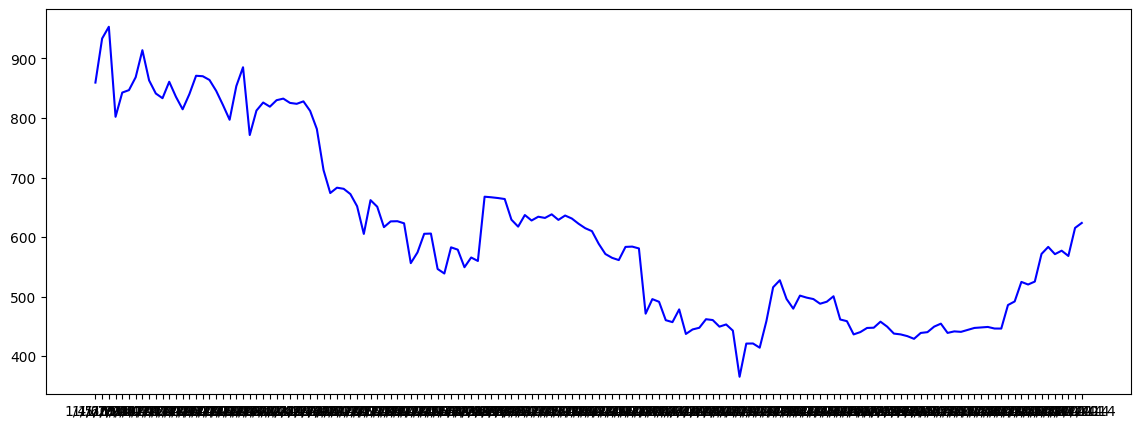

In [27]:
plt.figure(figsize=(14,5))
plt.plot(df['date'][251:], close_prices[251:], color='blue', label='Actual Cryptocurrency Price')
plt.plot(df['date'][251:], y_pred, color='red', label='Predicted Cryptocurrency Price')
plt.title('Cryptocurrency Price Prediction')
plt.xlabel('date')
plt.ylabel('Cryptocurrency Price')
plt.legend()
plt.show()

In [25]:
new_prices = np.array([115.78, 120.35, 113.65, 142.28, 133.67, 122, 124.89, 117.55, 139.56, 140.34])
new_prices_scaled = scaler.transform(new_prices.reshape(-1, 1))
new_prices_scaled = new_prices_scaled.reshape((1, 10, 1))

predicted_future_price = model.predict(new_prices_scaled)
predicted_future_price = scaler.inverse_transform(predicted_future_price)
print("Predicted future price:", predicted_future_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted future price: 131.3294
